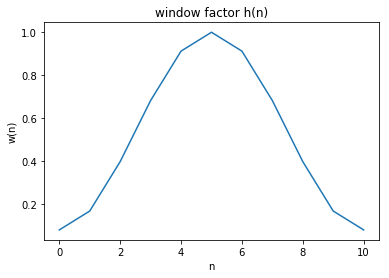

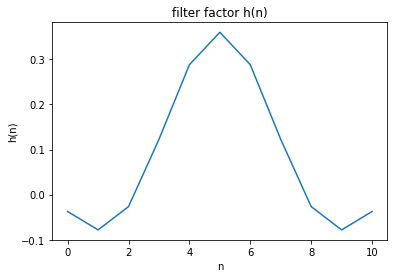

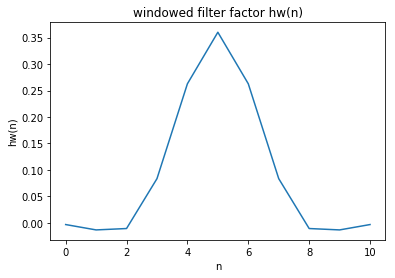

hw(n)= [-0.002993565708123649, -0.01312065862312761, -0.010498052559734334, 0.0836524630661973, 0.2627126149214665, 0.36, 0.2627126149214665, 0.0836524630661973, -0.010498052559734334, -0.01312065862312761, -0.002993565708123649]

[-0.00299 -0.01312 -0.0105   0.08365  0.26271  0.36     0.26271  0.08365
 -0.0105  -0.01312 -0.00299]
0.9995056021933566


In [30]:
# フィルタ係数を求める
# 4msで取っているので, サンプリング周波数は1/0.004 = 250 ?
# カットオフ周波数を工夫する必要あり

import numpy as np
import matplotlib.pyplot as plt

sample_freq = 250          # サンプリング周波数
cutoff_freq = 45           # 遮断周波数（カットオフ周波数）(Hz)
N = 11                     # インパルス応答の個数
T = 1/sample_freq          # 周期
g_delay = (N-1) / 2        # 群遅延
alpha = 0.540             # ハミング窓
# alpha = 0.50               # ハニング窓
omega_c = 2 * np.pi * cutoff_freq
# abs_N = N + int(g_delay)
hw = [0] * N
w = [0] * N
h = [0] * N

for i in range(0, N):
    # 一般化ハミング窓の計算
    w[i] = alpha + ((1-alpha) * np.cos((2*np.pi*(i-int(g_delay))) / (N-1)))
#     w[i] = alpha + ((1-alpha) * np.cos((2*np.pi*i) / (N-1)))
    
    # フィルタ係数の計算
    # 分母が0になる場合, sin(x)/x = 1 (x -> 0)を利用して計算
    if np.pi*(i-int(g_delay)) == 0.0:
        h[i] = (omega_c*T) / np.pi
    else:
        h[i] = np.sin((i-int(g_delay))*omega_c*T) / (np.pi*(i-int(g_delay)))
    # 窓関数がかかったフィルタ係数hw(n)を計算
    hw[i] = w[i] * h[i]

plt.title('window factor h(n)')
plt.xlabel('n')
plt.ylabel('w(n)')
plt.plot(w)
plt.show()
    
plt.title('filter factor h(n)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.plot(h)
plt.show()
    
plt.title('windowed filter factor hw(n)')
plt.xlabel('n')
plt.ylabel('hw(n)')
plt.plot(hw)
plt.show()

print('hw(n)=', hw)
print()
print(np.round(hw, 5))

print(np.sum(hw))

In [31]:
print('w[n]=', w)
print()
print('w[n]=', np.round(w, 5))
print()
print('hw[n]=', hw)
print()
print('hw[n]=', np.round(hw, 5))

w[n]= [0.08000000000000007, 0.16785218258752427, 0.3978521825875243, 0.6821478174124759, 0.9121478174124759, 1.0, 0.9121478174124759, 0.6821478174124759, 0.3978521825875243, 0.16785218258752427, 0.08000000000000007]

w[n]= [0.08    0.16785 0.39785 0.68215 0.91215 1.      0.91215 0.68215 0.39785
 0.16785 0.08   ]

hw[n]= [-0.002993565708123649, -0.01312065862312761, -0.010498052559734334, 0.0836524630661973, 0.2627126149214665, 0.36, 0.2627126149214665, 0.0836524630661973, -0.010498052559734334, -0.01312065862312761, -0.002993565708123649]

hw[n]= [-0.00299 -0.01312 -0.0105   0.08365  0.26271  0.36     0.26271  0.08365
 -0.0105  -0.01312 -0.00299]
